In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import networkx as nx

In [2]:
N_THETA = 16
N_PHI = int(N_THETA / 2)
R = 1

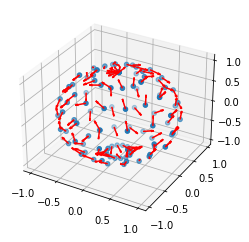

In [3]:
# Parameters for S^2
theta = np.linspace(0, 2*np.pi, N_THETA)
phi = np.linspace(0, np.pi, N_PHI)
thetav, phiv = np.meshgrid(theta, phi, indexing = 'ij')

# Generate points on the sphere
xx = R * np.cos(phiv.flatten()) * np.sin(thetav.flatten())
yy = R * np.sin(phiv.flatten()) * np.sin(thetav.flatten())
zz = R * np.cos(thetav.flatten())
pointcloud = np.rollaxis(np.array([xx, yy, zz]), 1)

# Generate tangent vectors to the sphere
uu = yy
vv = xx
ww = -2 * xx * yy / zz

# Plot manifold and corresponding vector field
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(xx, yy, zz)
ax.quiver(xx, yy, zz, uu, vv, ww, length=0.2, normalize=True, color='r')
plt.show()

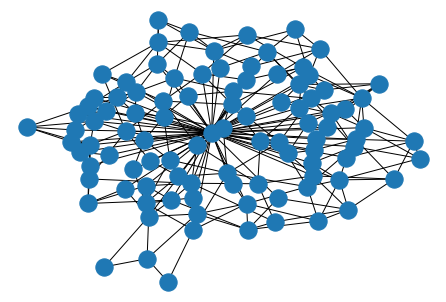

In [4]:
# Calculate Delaunay triangulation of the sample points
# on the manifold, and export it to a NetworkX graph
tri = Delaunay(pointcloud)
G = nx.Graph()
for path in tri.simplices:
    nx.add_path(G, path)
nx.draw(G)